In [109]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import tree
from sklearn import metrics
import seaborn as sns

/Users/erf/opt/anaconda3/envs/stan/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [80]:
%%time
train_data = pd.read_csv("/Users/erf/Kaggle/santander_customer_transaction_prediction//data/train.csv")
test_data = pd.read_csv("/Users/erf/Kaggle/santander_customer_transaction_prediction/data/test.csv")

In [81]:
train_data.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [157]:
for i in train_data.columns:
        if i not in ("target","ID_code"):
            train_data[f"bin_{i}"] = pd.cut(train_data[i],bins=10,labels=False)

In [158]:
train_data.shape

(200000, 404)

In [159]:
train_data.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  bin_var_191  bin_var_192  bin_var_193  bin_var_194  \
0  18.6266  ...            3            5            4            5   
1  16.5338  ...            5            5            7            3   
2  14.6155  ...            6            4            4            6   
3  14.9250  ...            3            3            4            7   
4  19.2514  ...            6            2            6            2   

   bin_var_195  bin_var_196  bin_var_197  bin_var_198  bin_var_199  bin_i_bin  
0            3            6            4            3            5          5  
1            7            6            4            6            6          6  
2            8            2            3            4            5          5  
3            4            3            7            5            4          4  
4            3            5            5            5            4          4  

[5 rows x 404 columns]

In [82]:
train_data.shape

(200000, 202)

In [83]:
test_data.shape

(200000, 201)

In [85]:
train_data.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [1]:
# lets look at distribution of the target

b = sns.countplot(x="target",data=train_data)
b.set_xlabel("target",fontsize=20)
b.set_ylabel("count",fontsize=20)

NameError: name 'sns' is not defined

Cross-Validation strategy:
as we see from the distribution of the target, it is skewed, so we can not use the kfold CV, because we want each fold has the same distribution as the whole data,using kfold or holdout CV, might lead to change the distribution of the some folds significantly, and that make us to have a wrong inference. Here we use Stratified k-fold CV.by using this CV we asure that each fold has the same proportion of classes.
* normally it works for classification problems to choose Stratified k-fold.
* for big dataset and time-series dataset we normally use hold-out CV.


# Tree

In [86]:
train_tree = train_data.drop(["target","ID_code"],axis=1)

In [87]:
train_tree_80 = train_tree.head(160000)

In [93]:
y_train_80 = train_data["target"].head(160000)

In [94]:
y_train_valid = train_data["target"].tail(40000)

In [88]:
train_tree_valid = train_tree.tail(40000)

In [92]:
test_tree = test_data.drop(["ID_code"],axis=1)

In [95]:
clf = tree.DecisionTreeClassifier(max_depth=3)

In [96]:
clf.fit(train_tree_80,y_train_80)

DecisionTreeClassifier(max_depth=3)

In [100]:
train_80_pred = clf.predict(train_tree_80)

In [101]:
train_80_acc = metrics.accuracy_score(y_train_80,train_80_pred)

In [102]:
train_80_acc

0.899825

In [103]:
train_valid_pred = clf.predict(train_tree_valid)

In [104]:
train_valid_acc = metrics.accuracy_score(y_train_valid,train_valid_pred)

In [105]:
train_valid_acc

0.898725

In [107]:
train_accuracies = [0.5]
valid_accuracies = [0.5]

In [108]:
for depth in range(1,25):
    clf1 = tree.DecisionTreeClassifier(max_depth=depth)
    clf1.fit(train_tree_80,y_train_80)
    train_predictions = clf.predict(train_tree_80)
    valid_predictions = clf.predict(train_tree_valid)
    train_accuracy = metrics.accuracy_score(y_train_80,train_80_pred)
    valid_accuracy = metrics.accuracy_score(y_train_valid,train_valid_pred)
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)

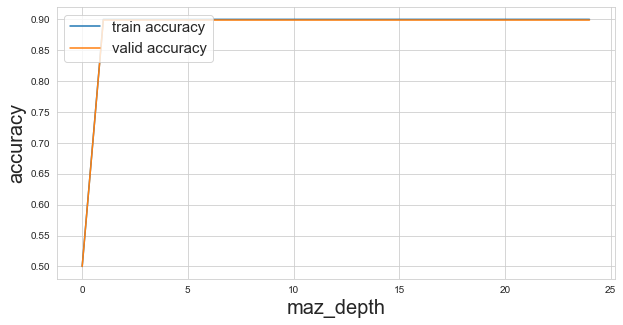

In [110]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies,label="train accuracy")
plt.plot(valid_accuracies,label="valid accuracy")
plt.legend(loc="upper left", prop={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel("maz_depth",size=20)
plt.ylabel("accuracy",size=20)
plt.show()

/Users/erf/opt/anaconda3/envs/stan/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='var_198', ylabel='Density'>

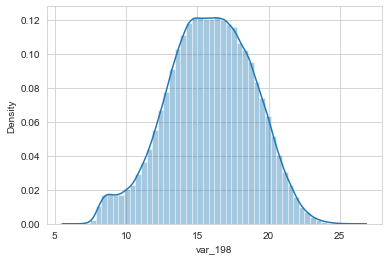

In [113]:
sns.distplot(train_data['var_198'])

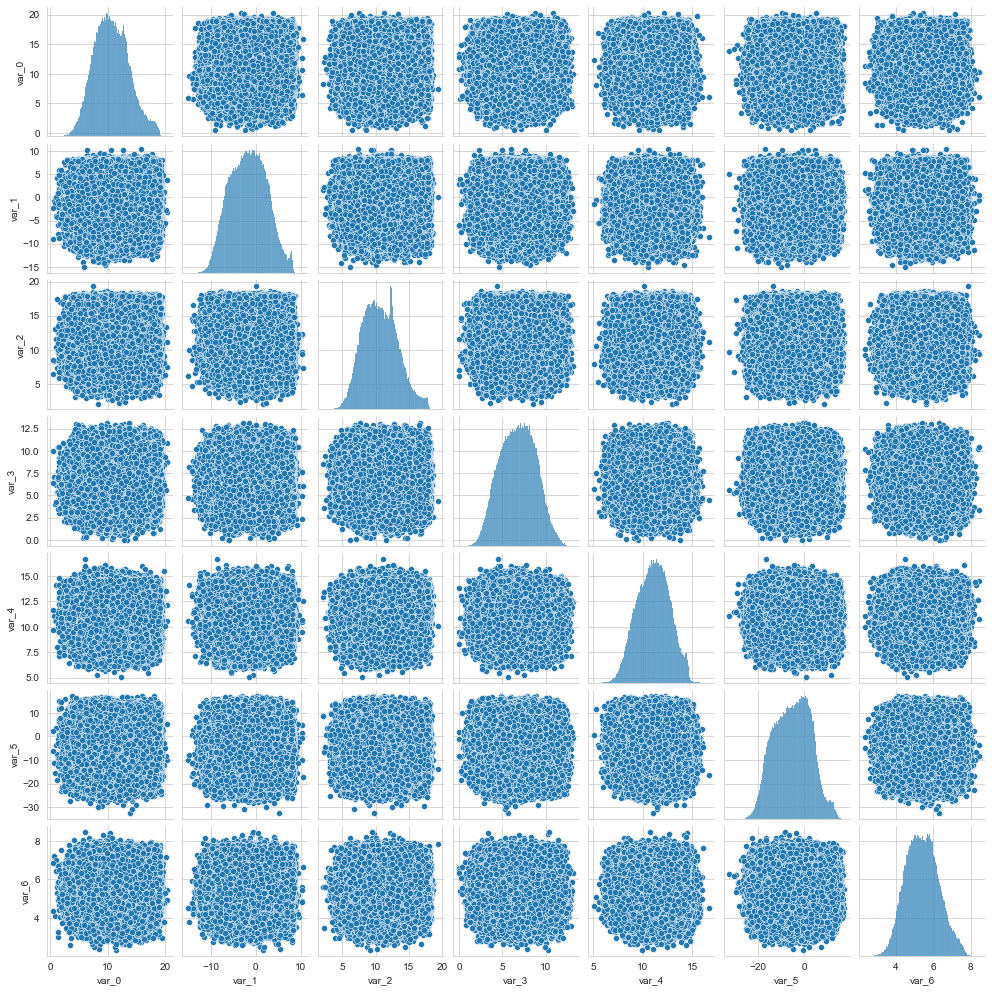

In [114]:
cols = ["var_0","var_1","var_2","var_3","var_4","var_5","var_6"]
sns.pairplot(train_data[cols], height=2)

/Users/erf/opt/anaconda3/envs/stan/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/erf/opt/anaconda3/envs/stan/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/erf/opt/anaconda3/envs/stan/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

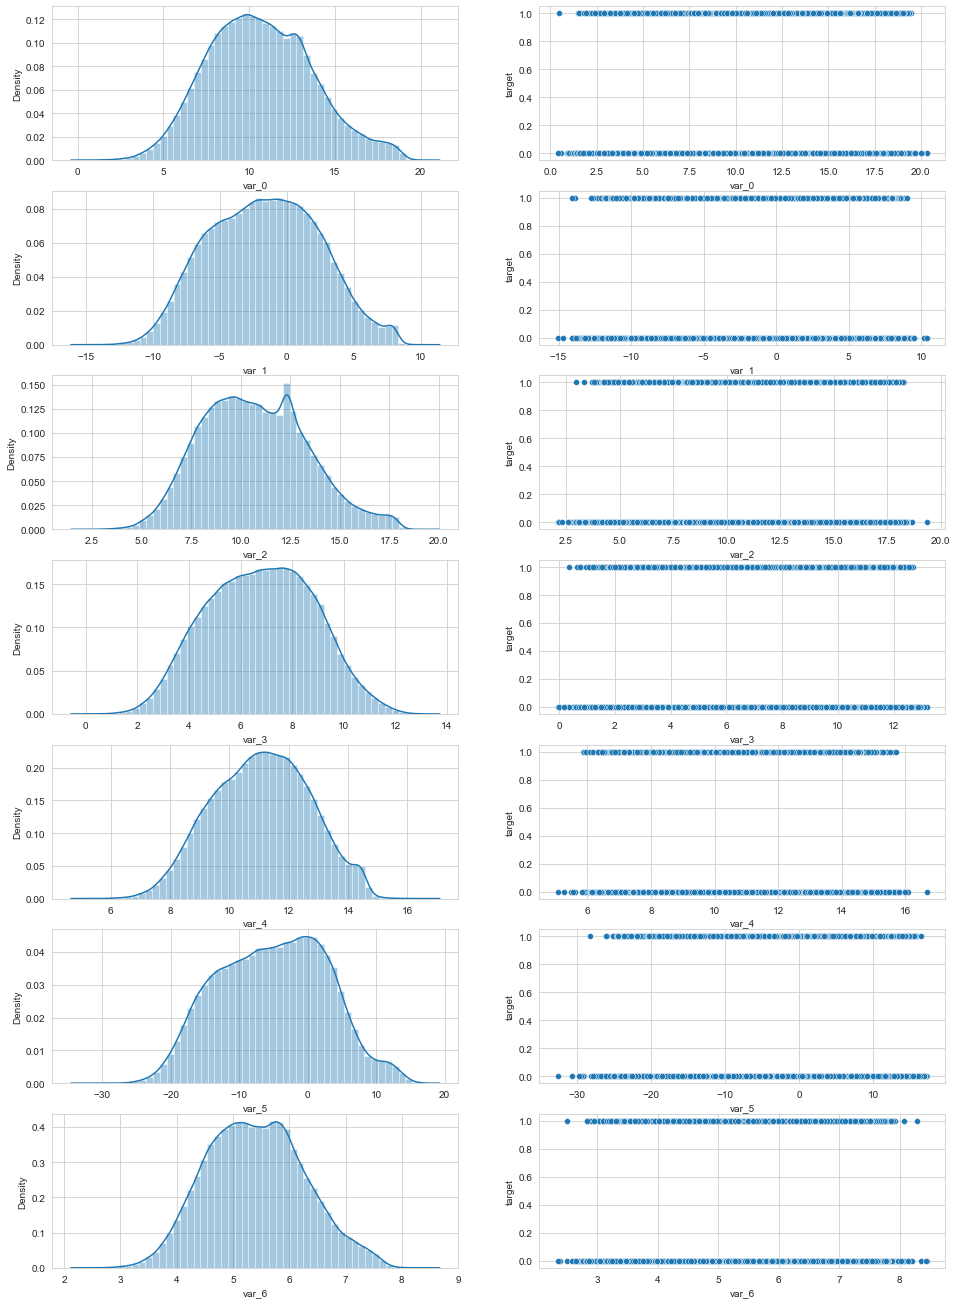

In [115]:
plt.figure(figsize=(16, 30))
for idx, f in enumerate(["var_0","var_1","var_2","var_3","var_4","var_5","var_6"]):
    plt.subplot(9, 2, 2*idx+1)
    sns.distplot(train_data[f])
    plt.subplot(9, 2, 2*idx+2)
    sns.scatterplot(x=f, y='target', data=train_data)

In [129]:
df = pd.DataFrame(np.random.rand(100,2),columns=[f"f_{i}" for i in range(1,3)])

In [130]:
df

f_1       f_2
0   0.597879  0.272009
1   0.631987  0.145309
2   0.329468  0.310400
3   0.994097  0.648471
4   0.723412  0.321809
..       ...       ...
95  0.716488  0.628780
96  0.659790  0.936159
97  0.682806  0.958827
98  0.064709  0.327209
99  0.440904  0.660172

[100 rows x 2 columns]

In [131]:
from sklearn import preprocessing

In [132]:
pf = preprocessing.PolynomialFeatures(degree=2,interaction_only=False,include_bias=False)

In [133]:
pf.fit(df)

PolynomialFeatures(include_bias=False)

In [134]:
poly_feats = pf.transform(df)

In [135]:
num_feats = poly_feats.shape[1]

In [136]:
df_transformed = pd.DataFrame(poly_feats,columns=[f"f_{i}" for i in range(1,num_feats+1)])

In [137]:
df_transformed

f_1       f_2       f_3       f_4       f_5
0   0.597879  0.272009  0.357460  0.162628  0.073989
1   0.631987  0.145309  0.399408  0.091834  0.021115
2   0.329468  0.310400  0.108549  0.102267  0.096348
3   0.994097  0.648471  0.988229  0.644643  0.420515
4   0.723412  0.321809  0.523326  0.232801  0.103561
..       ...       ...       ...       ...       ...
95  0.716488  0.628780  0.513354  0.450513  0.395365
96  0.659790  0.936159  0.435323  0.617668  0.876394
97  0.682806  0.958827  0.466224  0.654693  0.919349
98  0.064709  0.327209  0.004187  0.021173  0.107066
99  0.440904  0.660172  0.194396  0.291072  0.435827

[100 rows x 5 columns]

In [138]:
df_binning = df

In [139]:
df_binning

f_1       f_2
0   0.597879  0.272009
1   0.631987  0.145309
2   0.329468  0.310400
3   0.994097  0.648471
4   0.723412  0.321809
..       ...       ...
95  0.716488  0.628780
96  0.659790  0.936159
97  0.682806  0.958827
98  0.064709  0.327209
99  0.440904  0.660172

[100 rows x 2 columns]

In [146]:
for i in df.columns:
    df["i_bin"] = pd.cut(df[i],bins=10,labels=False)

In [147]:
df

f_1       f_2  f_1_bin10  i_bin
0   0.597879  0.272009          5      5
1   0.631987  0.145309          6      6
2   0.329468  0.310400          3      3
3   0.994097  0.648471          9      9
4   0.723412  0.321809          7      7
..       ...       ...        ...    ...
95  0.716488  0.628780          7      7
96  0.659790  0.936159          6      6
97  0.682806  0.958827          6      6
98  0.064709  0.327209          0      0
99  0.440904  0.660172          4      4

[100 rows x 4 columns]

In [141]:
df_binning

f_1       f_2  f_1_bin10
0   0.597879  0.272009          5
1   0.631987  0.145309          6
2   0.329468  0.310400          3
3   0.994097  0.648471          9
4   0.723412  0.321809          7
..       ...       ...        ...
95  0.716488  0.628780          7
96  0.659790  0.936159          6
97  0.682806  0.958827          6
98  0.064709  0.327209          0
99  0.440904  0.660172          4

[100 rows x 3 columns]

In [169]:
df_binning["f_1_bin10"].value_counts()[df_binning["f_1_bin10"]]

5     8
6     9
3    11
9    10
7    13
     ..
7    13
6     9
6     9
0     8
4     6
Name: f_1_bin10, Length: 100, dtype: int64

In [175]:
df_binning.loc[df_binning["f_1_bin10"].value_counts()[df_binning["f_1_bin10"]].values<7,"f_1_bin10"]

18    4
28    4
43    4
81    4
94    4
99    4
Name: f_1_bin10, dtype: int64

In [170]:
df_binning["f_1_bin10"].value_counts

<bound method IndexOpsMixin.value_counts of 0     5
1     6
2     3
3     9
4     7
     ..
95    7
96    6
97    6
98    0
99    4
Name: f_1_bin10, Length: 100, dtype: int64>

In [171]:
df_binning["f_1_bin10"].value_counts()

1    16
7    13
3    11
9    10
2    10
8     9
6     9
5     8
0     8
4     6
Name: f_1_bin10, dtype: int64

# EDA 


In [178]:
import gc
import os
import logging
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
warnings.filterwarnings('ignore')

In [179]:
%%time
train_df = pd.read_csv("/Users/erf/Kaggle/santander_customer_transaction_prediction//data/train.csv")
test_df = pd.read_csv("/Users/erf/Kaggle/santander_customer_transaction_prediction//data/test.csv")

CPU times: user 8.38 s, sys: 1.02 s, total: 9.4 s
Wall time: 9.78 s


In [180]:
train_df.shape, test_df.shape

((200000, 202), (200000, 201))

In [181]:
train_df.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [182]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [183]:
%%time
missing_data(train_df)

CPU times: user 347 ms, sys: 274 ms, total: 620 ms
Wall time: 667 ms


ID_code target    var_0    var_1    var_2    var_3    var_4    var_5  \
Total         0      0        0        0        0        0        0        0   
Percent       0      0        0        0        0        0        0        0   
Types    object  int64  float64  float64  float64  float64  float64  float64   

           var_6    var_7  ...  var_190  var_191  var_192  var_193  var_194  \
Total          0        0  ...        0        0        0        0        0   
Percent        0        0  ...        0        0        0        0        0   
Types    float64  float64  ...  float64  float64  float64  float64  float64   

         var_195  var_196  var_197  var_198  var_199  
Total          0        0        0        0        0  
Percent        0        0        0        0        0  
Types    float64  float64  float64  float64  float64  

[3 rows x 202 columns]

In [184]:
%%time
missing_data(test_df)

CPU times: user 312 ms, sys: 200 ms, total: 512 ms
Wall time: 517 ms


ID_code    var_0    var_1    var_2    var_3    var_4    var_5  \
Total         0        0        0        0        0        0        0   
Percent       0        0        0        0        0        0        0   
Types    object  float64  float64  float64  float64  float64  float64   

           var_6    var_7    var_8  ...  var_190  var_191  var_192  var_193  \
Total          0        0        0  ...        0        0        0        0   
Percent        0        0        0  ...        0        0        0        0   
Types    float64  float64  float64  ...  float64  float64  float64  float64   

         var_194  var_195  var_196  var_197  var_198  var_199  
Total          0        0        0        0        0        0  
Percent        0        0        0        0        0        0  
Types    float64  float64  float64  float64  float64  float64  

[3 rows x 201 columns]

In [185]:
%%time
train_df.describe()

CPU times: user 1.79 s, sys: 148 ms, total: 1.93 s
Wall time: 2.05 s


target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [186]:
%time
test_df.describe()

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 7.15 µs


var_0          var_1          var_2          var_3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.658737      -1.624244      10.707452       6.788214   
std         3.036716       4.040509       2.633888       2.052724   
min         0.188700     -15.043400       2.355200      -0.022400   
25%         8.442975      -4.700125       8.735600       5.230500   
50%        10.513800      -1.590500      10.560700       6.822350   
75%        12.739600       1.343400      12.495025       8.327600   
max        22.323400       9.385100      18.714100      13.142000   

               var_4          var_5          var_6          var_7  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       11.076399      -5.050558       5.415164      16.529143   
std         1.616456       7.869293       0.864686       3.424482   
min         5.484400     -27.767000       2.216400       5.713700   
25%         9.891075     -11.201400       4.772600      13.933900   
50%        11.099750      -4.834100       5.391600      16.422700   
75%        12.253400       0.942575       6.005800      19.094550   
max        16.037100      17.253700       8.302500      28.292800   

               var_8          var_9  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean        0.277135       7.569407  ...       3.189766       7.458269   
std         3.333375       1.231865  ...       4.551239       3.025189   
min        -9.956000       4.243300  ...     -14.093300      -2.407000   
25%        -2.303900       6.623800  ...      -0.095000       5.166500   
50%         0.372000       7.632000  ...       3.162400       7.379000   
75%         2.930025       8.584825  ...       6.336475       9.531100   
max         9.665500      11.003600  ...      20.359000      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.925944       3.322016      17.996967      -0.133657   
std         1.479966       3.995599       3.140652       1.429678   
min        -3.340900     -11.413100       9.382800      -4.911900   
25%         0.882975       0.587600      15.634775      -1.160700   
50%         1.892600       3.428500      17.977600      -0.162000   
75%         2.956000       6.174200      20.391725       0.837900   
max         8.005000      17.632600      27.947800       4.545400   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.290899       8.912428      15.869184      -3.246342  
std         5.446346       0.920904       3.008717      10.398589  
min       -13.944200       6.169600       6.584000     -39.457800  
25%        -1.948600       8.260075      13.847275     -11.124000  
50%         2.403600       8.892800      15.943400      -2.725950  
75%         6.519800       9.595900      18.045200       4.935400  
max        15.920700      12.275800      26.538400      27.907400  

[8 rows x 200 columns]

In [187]:
def plot_feature_scatter(df1, df2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(4,4,figsize=(14,14))

    for feature in features:
        i += 1
        plt.subplot(4,4,i)
        plt.scatter(df1[feature], df2[feature], marker='+')
        plt.xlabel(feature, fontsize=9)
    plt.show();

<Figure size 432x288 with 0 Axes>

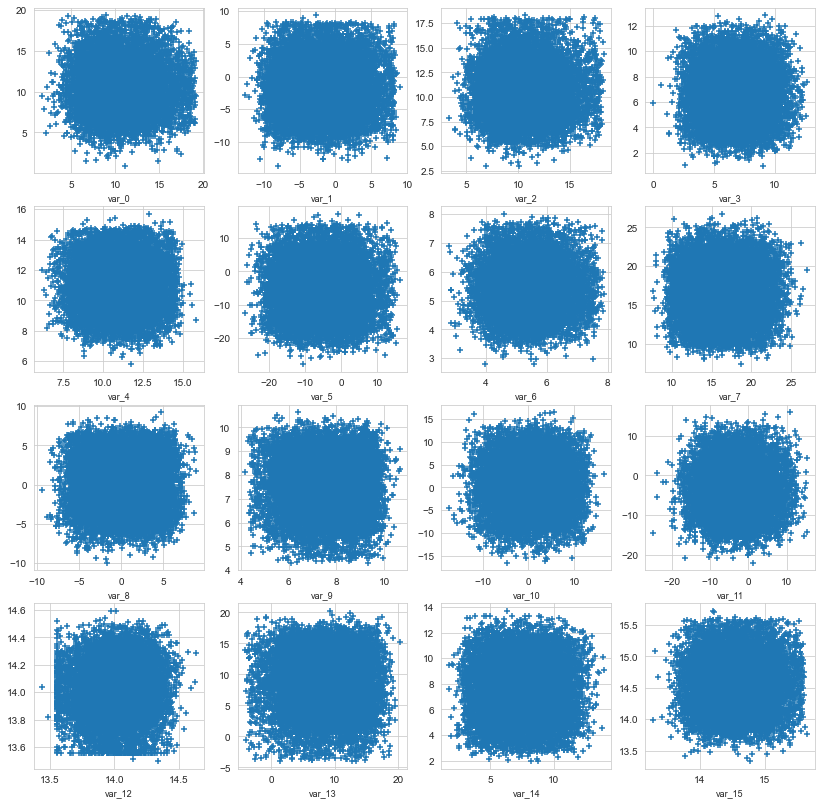

In [188]:
features = ['var_0', 'var_1','var_2','var_3', 'var_4', 'var_5', 'var_6', 'var_7', 
           'var_8', 'var_9', 'var_10','var_11','var_12', 'var_13', 'var_14', 'var_15', 
           ]
plot_feature_scatter(train_df[::20],test_df[::20], features)

<AxesSubplot:xlabel='target', ylabel='count'>

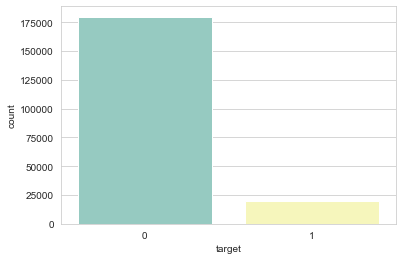

In [189]:
sns.countplot(train_df['target'], palette='Set3')

In [190]:
print("There are {}% target values with 1".format(100 * train_df["target"].value_counts()[1]/train_df.shape[0]))


There are 10.049% target values with 1


In [191]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

<Figure size 432x288 with 0 Axes>

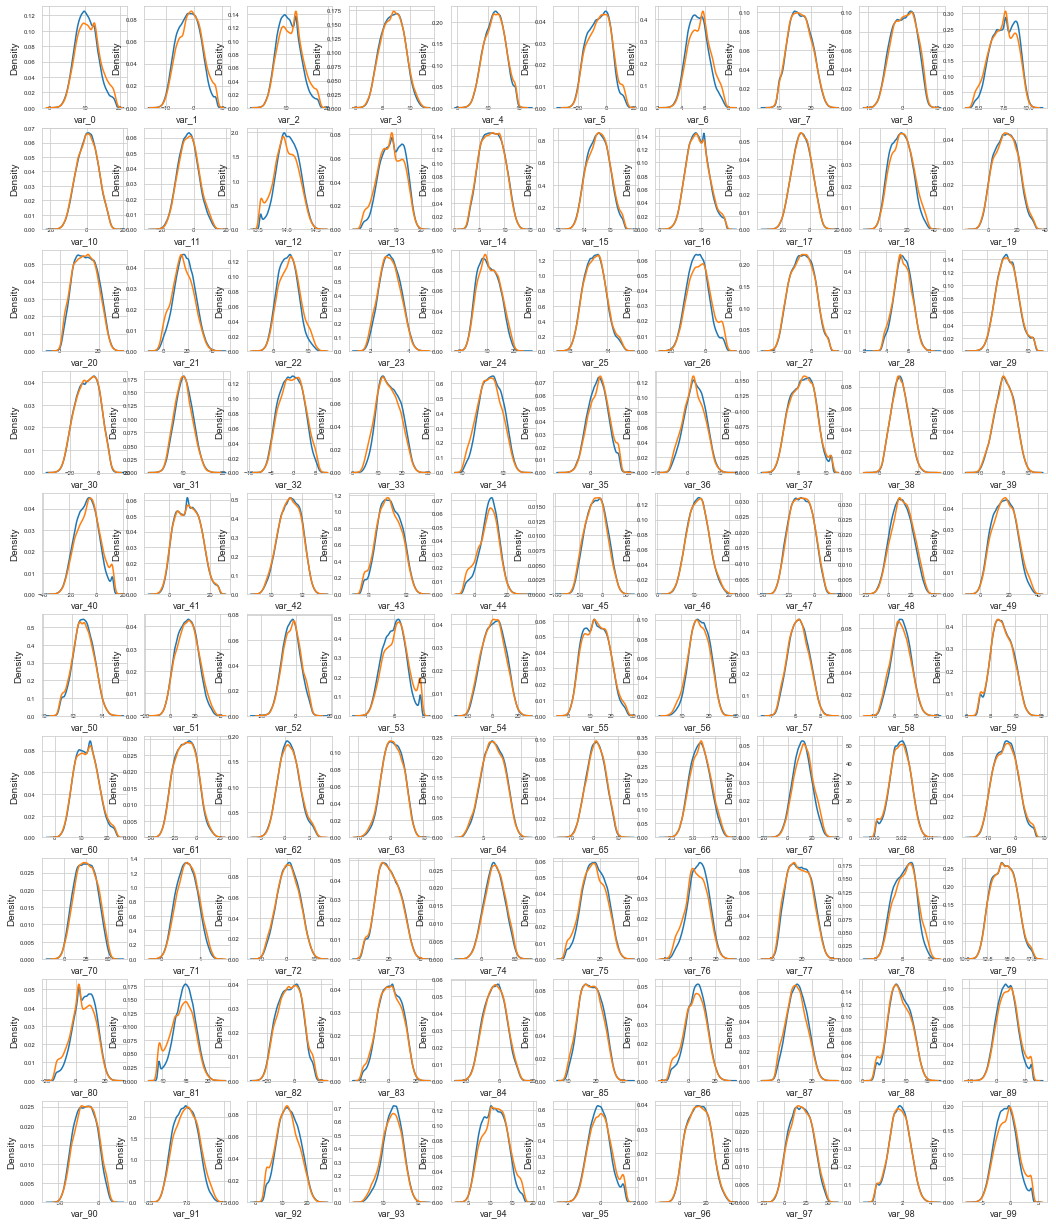

In [192]:
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
features = train_df.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 432x288 with 0 Axes>

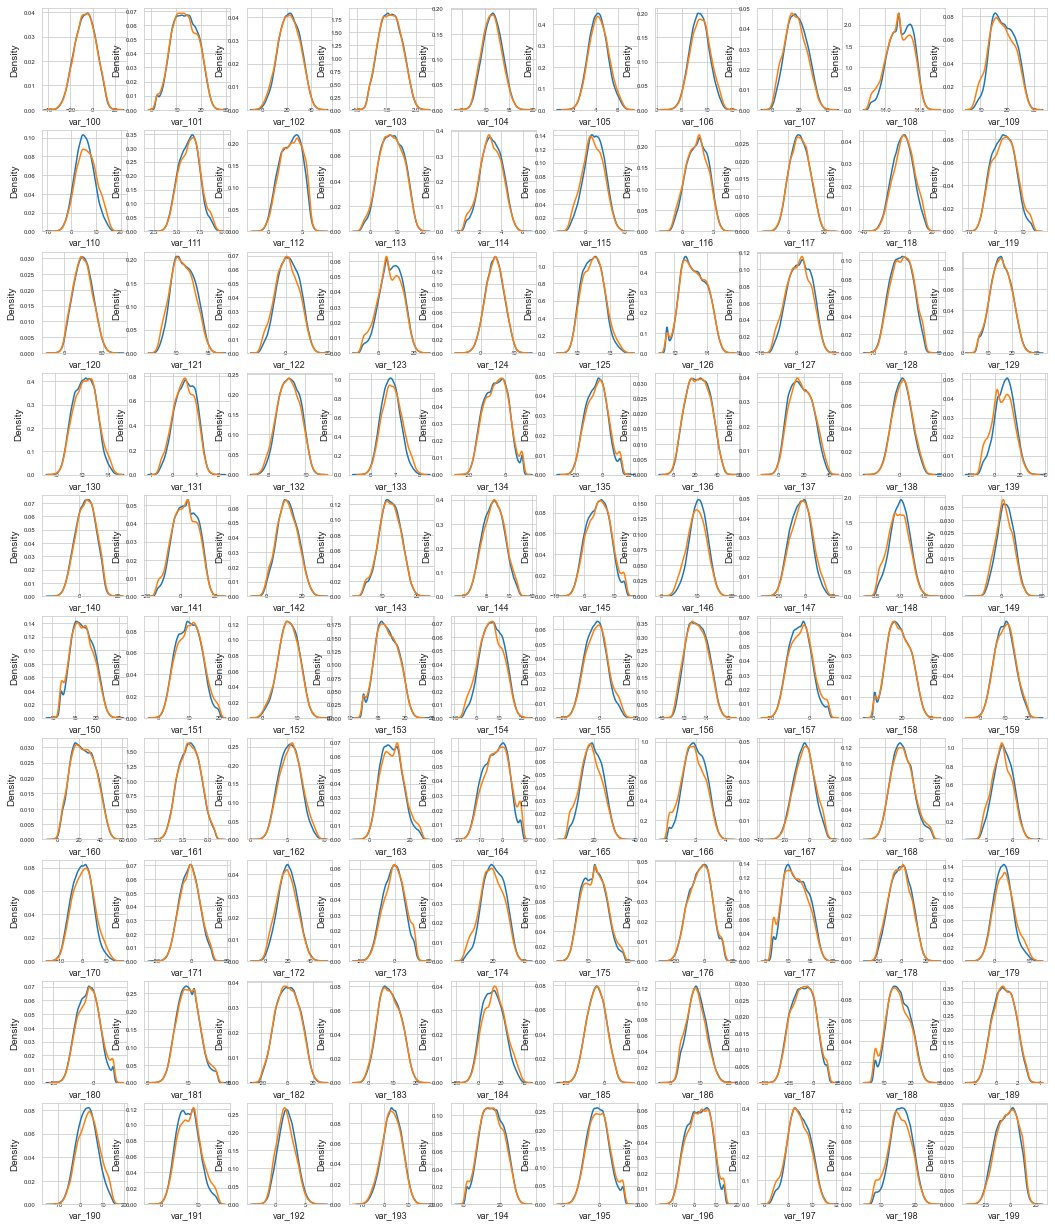

CPU times: user 2min 39s, sys: 1.58 s, total: 2min 41s
Wall time: 1min 13s


In [193]:
%%time
features = train_df.columns.values[102:202]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 432x288 with 0 Axes>

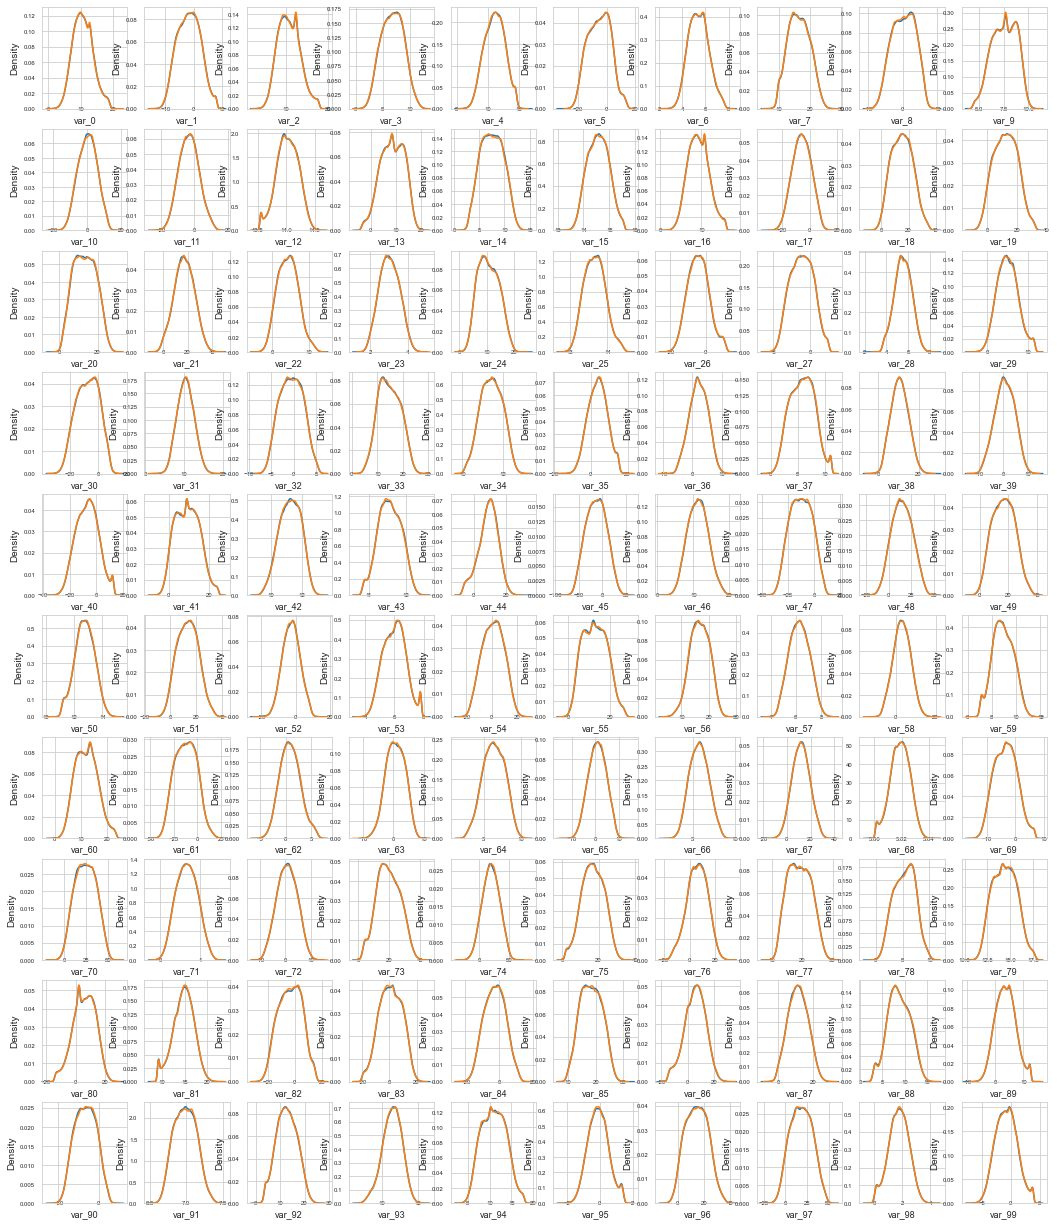

CPU times: user 4min 8s, sys: 2.67 s, total: 4min 11s
Wall time: 2min 12s


In [194]:
%%time
features = train_df.columns.values[2:102]
plot_feature_distribution(train_df, test_df, 'train', 'test', features)

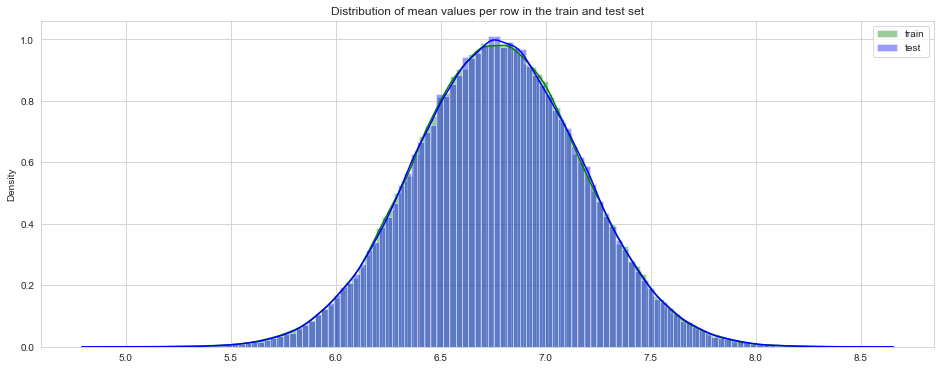

In [195]:
#Let's check the distribution of the mean values per row in the train and test set.
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train_df[features].mean(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(test_df[features].mean(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

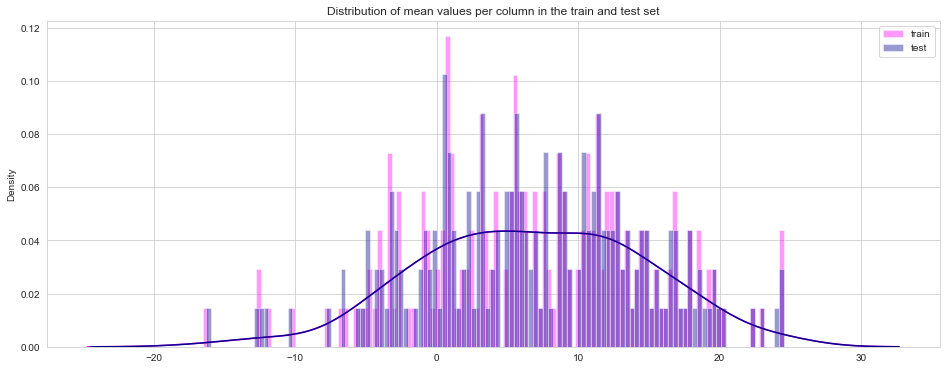

In [197]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(train_df[features].mean(axis=0),color="magenta",kde=True,bins=120, label='train')
sns.distplot(test_df[features].mean(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

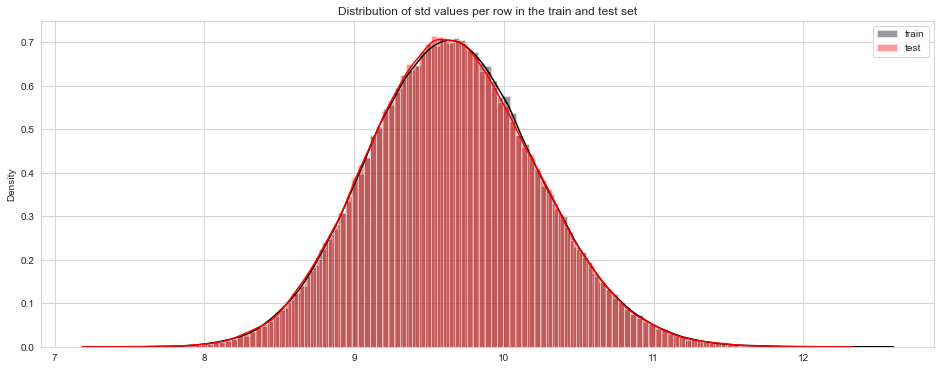

In [198]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per row in the train and test set")
sns.distplot(train_df[features].std(axis=1),color="black", kde=True,bins=120, label='train')
sns.distplot(test_df[features].std(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend();plt.show()

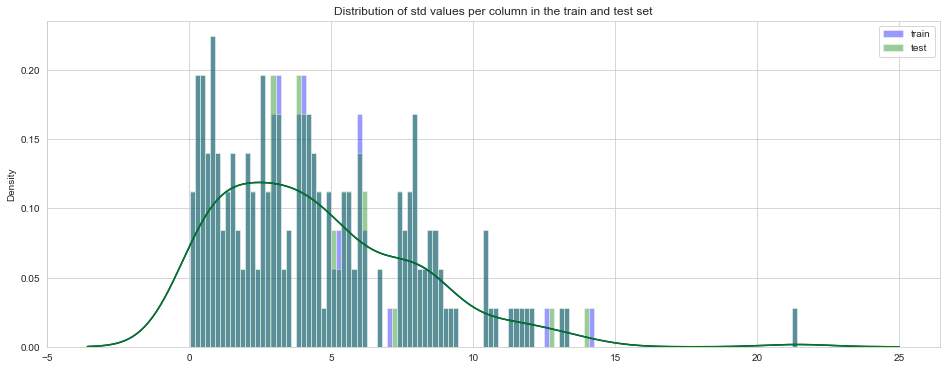

In [199]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per column in the train and test set")
sns.distplot(train_df[features].std(axis=0),color="blue",kde=True,bins=120, label='train')
sns.distplot(test_df[features].std(axis=0),color="green", kde=True,bins=120, label='test')
plt.legend(); plt.show()

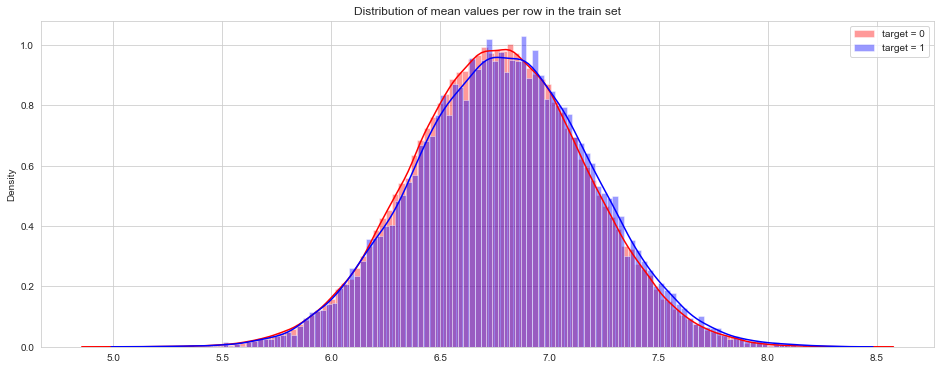

In [200]:
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per row in the train set")
sns.distplot(t0[features].mean(axis=1),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].mean(axis=1),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

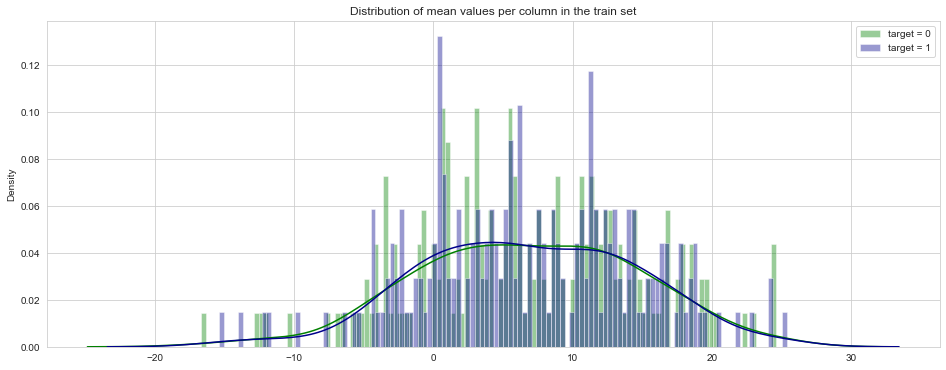

In [201]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train set")
sns.distplot(t0[features].mean(axis=0),color="green", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].mean(axis=0),color="darkblue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

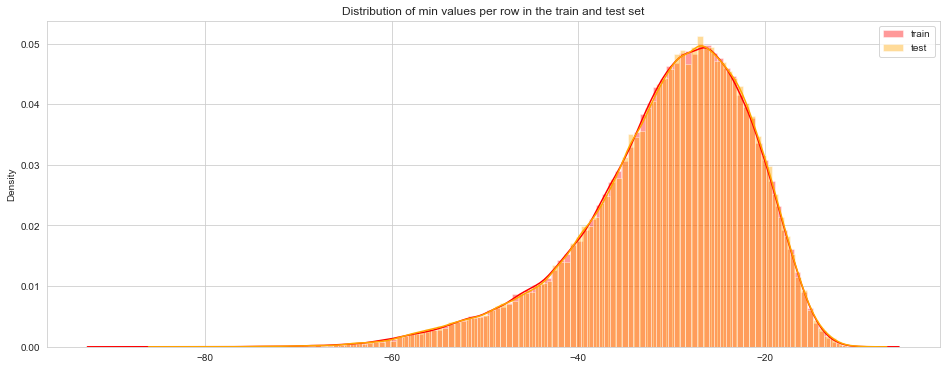

In [202]:
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of min values per row in the train and test set")
sns.distplot(train_df[features].min(axis=1),color="red", kde=True,bins=120, label='train')
sns.distplot(test_df[features].min(axis=1),color="orange", kde=True,bins=120, label='test')
plt.legend()
plt.show()

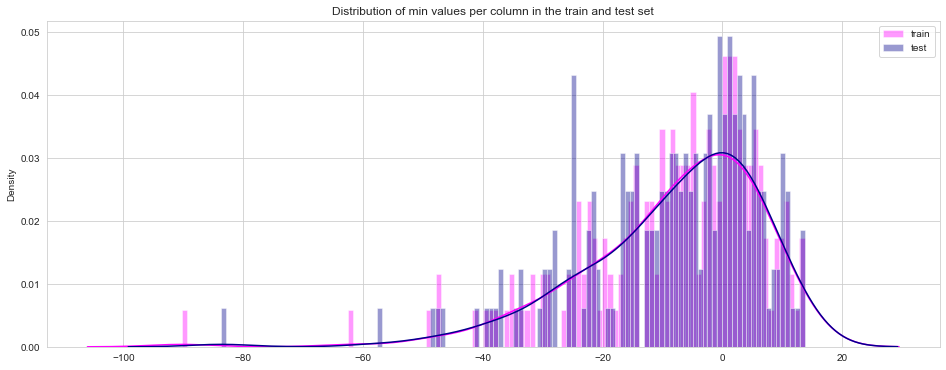

In [203]:
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of min values per column in the train and test set")
sns.distplot(train_df[features].min(axis=0),color="magenta", kde=True,bins=120, label='train')
sns.distplot(test_df[features].min(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

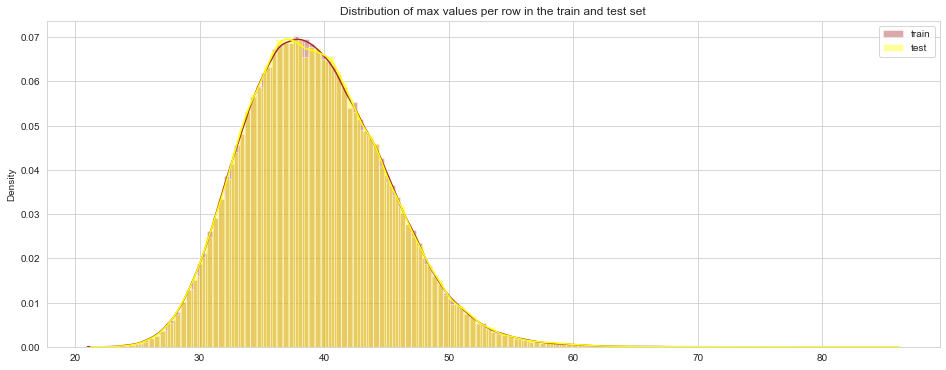

In [204]:
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of max values per row in the train and test set")
sns.distplot(train_df[features].max(axis=1),color="brown", kde=True,bins=120, label='train')
sns.distplot(test_df[features].max(axis=1),color="yellow", kde=True,bins=120, label='test')
plt.legend()
plt.show()

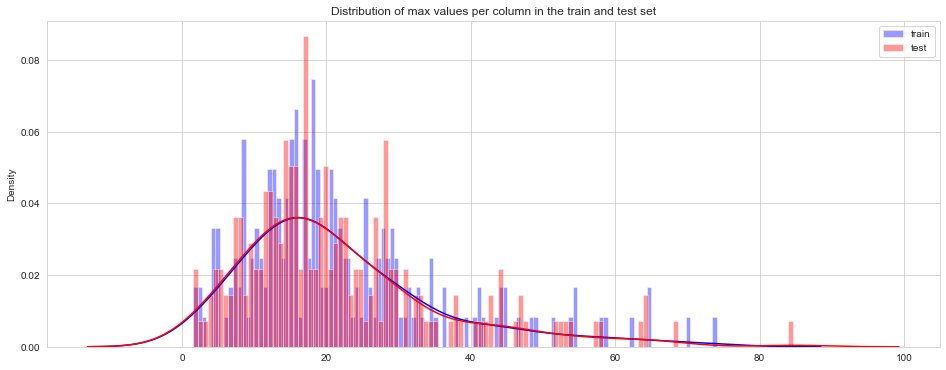

In [205]:
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of max values per column in the train and test set")
sns.distplot(train_df[features].max(axis=0),color="blue", kde=True,bins=120, label='train')
sns.distplot(test_df[features].max(axis=0),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.show()

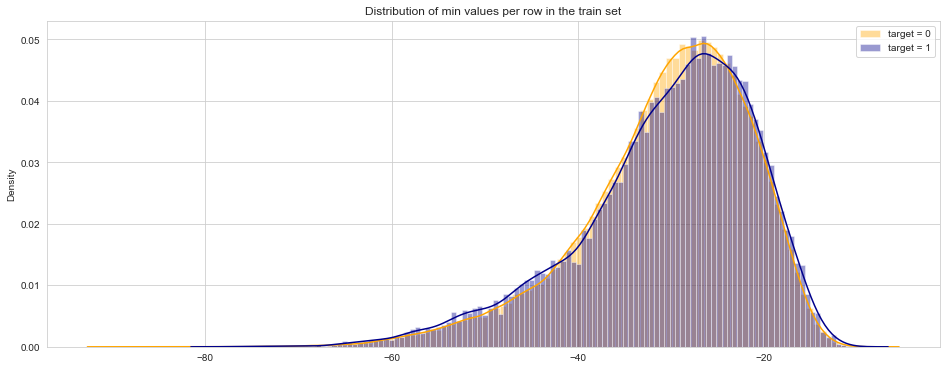

In [206]:
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of min values per row in the train set")
sns.distplot(t0[features].min(axis=1),color="orange", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].min(axis=1),color="darkblue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

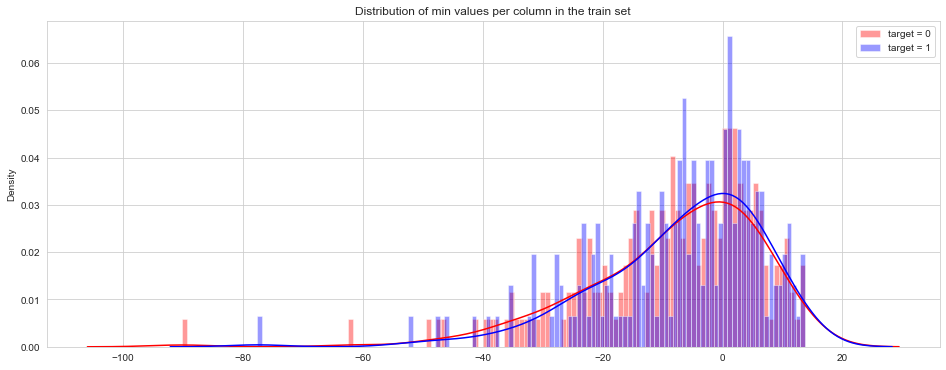

In [207]:
plt.figure(figsize=(16,6))
plt.title("Distribution of min values per column in the train set")
sns.distplot(t0[features].min(axis=0),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].min(axis=0),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

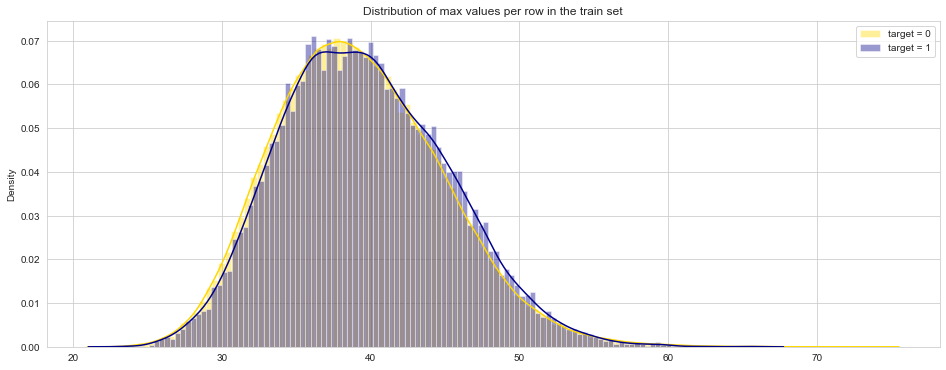

In [208]:
plt.figure(figsize=(16,6))
plt.title("Distribution of max values per row in the train set")
sns.distplot(t0[features].max(axis=1),color="gold", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].max(axis=1),color="darkblue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

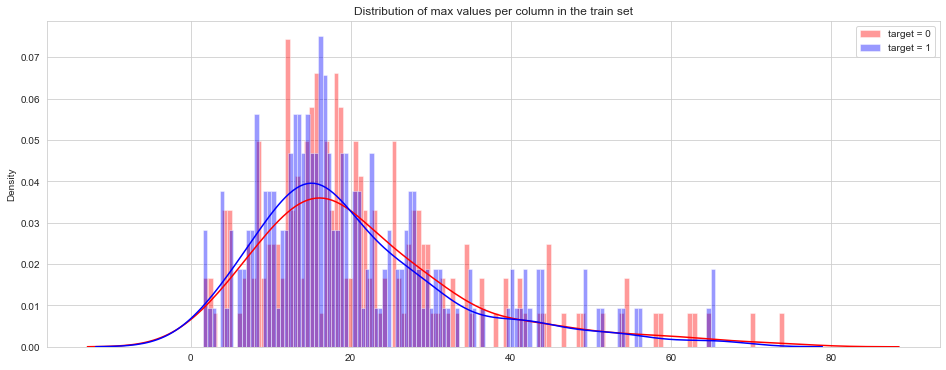

In [209]:
plt.figure(figsize=(16,6))
plt.title("Distribution of max values per column in the train set")
sns.distplot(t0[features].max(axis=0),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].max(axis=0),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

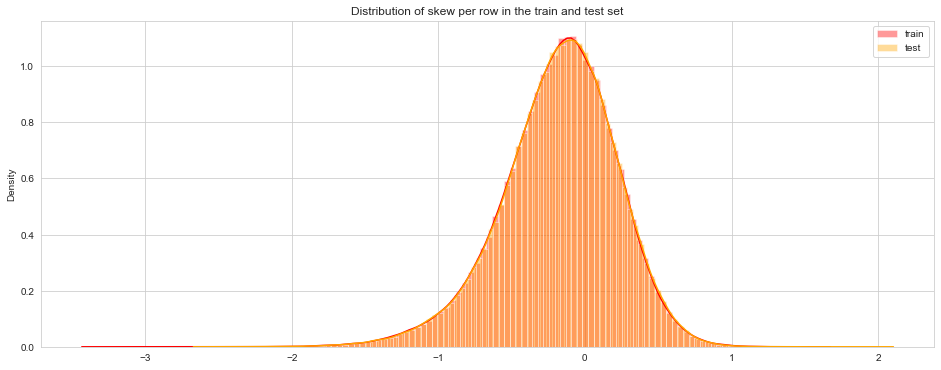

In [210]:
plt.figure(figsize=(16,6))
plt.title("Distribution of skew per row in the train and test set")
sns.distplot(train_df[features].skew(axis=1),color="red", kde=True,bins=120, label='train')
sns.distplot(test_df[features].skew(axis=1),color="orange", kde=True,bins=120, label='test')
plt.legend()
plt.show()

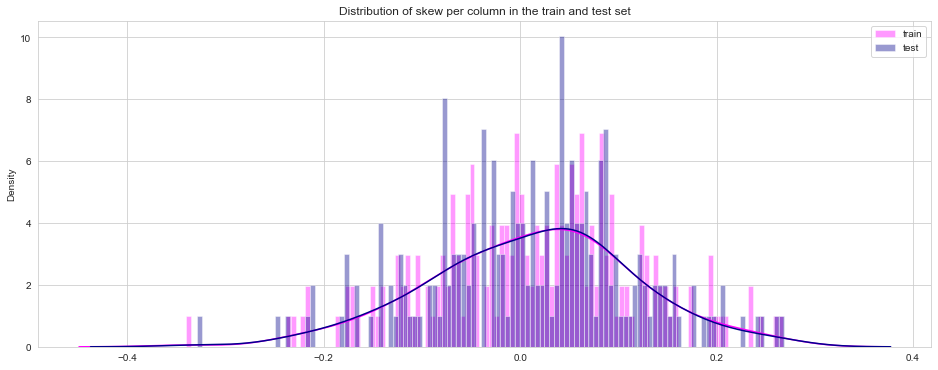

In [211]:
plt.figure(figsize=(16,6))
plt.title("Distribution of skew per column in the train and test set")
sns.distplot(train_df[features].skew(axis=0),color="magenta", kde=True,bins=120, label='train')
sns.distplot(test_df[features].skew(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

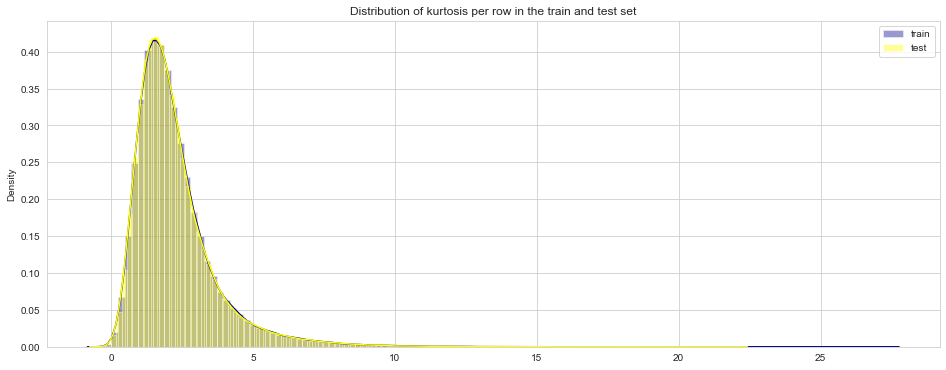

In [212]:
plt.figure(figsize=(16,6))
plt.title("Distribution of kurtosis per row in the train and test set")
sns.distplot(train_df[features].kurtosis(axis=1),color="darkblue", kde=True,bins=120, label='train')
sns.distplot(test_df[features].kurtosis(axis=1),color="yellow", kde=True,bins=120, label='test')
plt.legend()
plt.show()

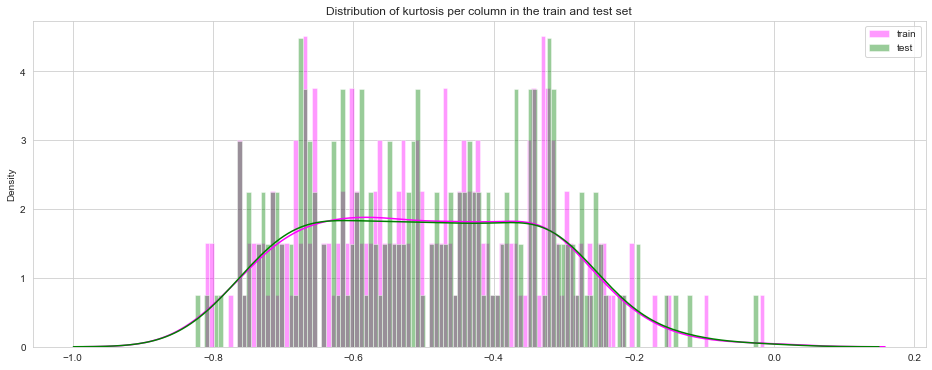

In [213]:
plt.figure(figsize=(16,6))
plt.title("Distribution of kurtosis per column in the train and test set")
sns.distplot(train_df[features].kurtosis(axis=0),color="magenta", kde=True,bins=120, label='train')
sns.distplot(test_df[features].kurtosis(axis=0),color="green", kde=True,bins=120, label='test')
plt.legend()
plt.show()

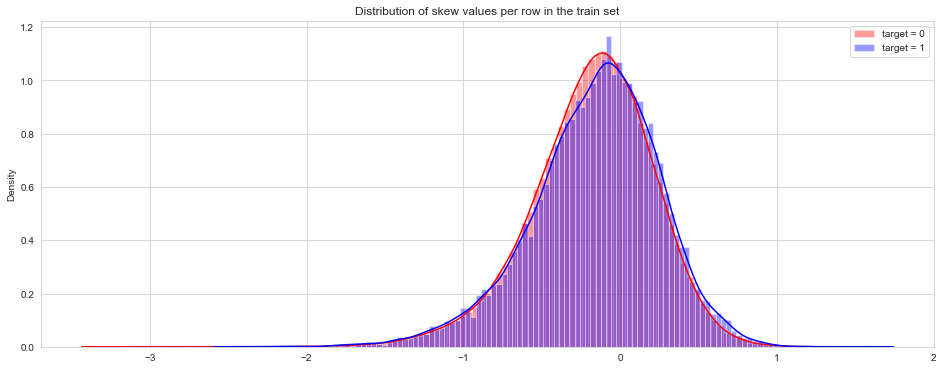

In [214]:
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of skew values per row in the train set")
sns.distplot(t0[features].skew(axis=1),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].skew(axis=1),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

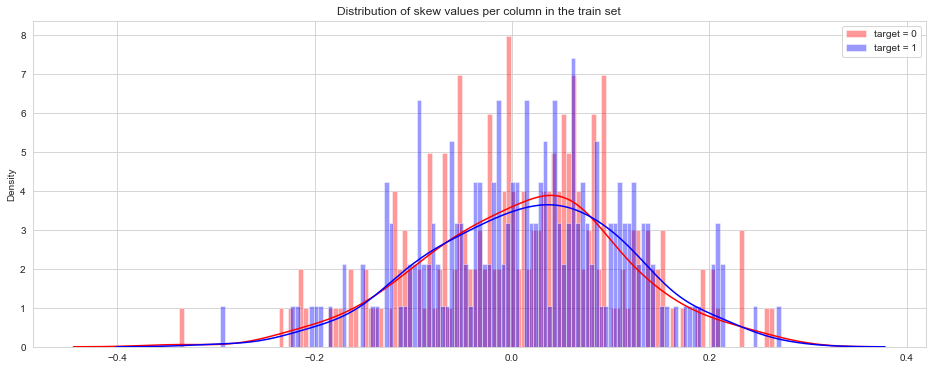

In [215]:
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of skew values per column in the train set")
sns.distplot(t0[features].skew(axis=0),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].skew(axis=0),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

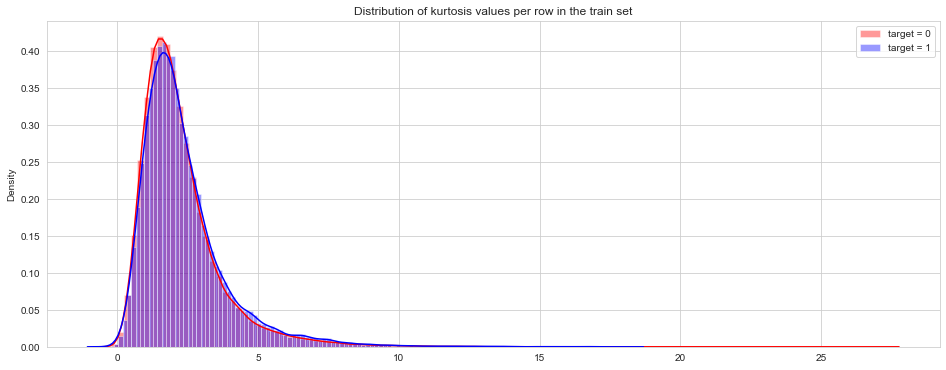

In [216]:
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of kurtosis values per row in the train set")
sns.distplot(t0[features].kurtosis(axis=1),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].kurtosis(axis=1),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

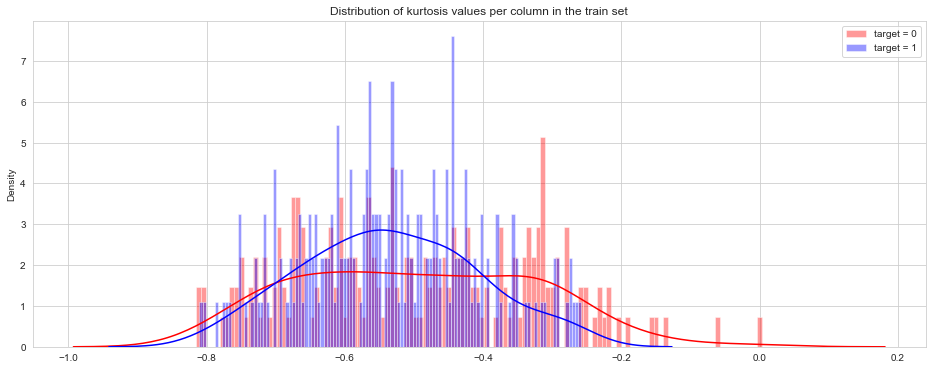

In [217]:
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of kurtosis values per column in the train set")
sns.distplot(t0[features].kurtosis(axis=0),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].kurtosis(axis=0),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()


In [218]:
%%time
correlations = train_df[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.head(10)

CPU times: user 13 s, sys: 374 ms, total: 13.3 s
Wall time: 13.5 s


level_0  level_1             0
0   var_75  var_191  2.703975e-08
1  var_191   var_75  2.703975e-08
2  var_173    var_6  5.942735e-08
3    var_6  var_173  5.942735e-08
4  var_126  var_109  1.313947e-07
5  var_109  var_126  1.313947e-07
6  var_144   var_27  1.772502e-07
7   var_27  var_144  1.772502e-07
8  var_177  var_100  3.116544e-07
9  var_100  var_177  3.116544e-07

In [219]:
correlations.tail(10)

level_0  level_1         0
39790  var_183  var_189  0.009359
39791  var_189  var_183  0.009359
39792  var_174   var_81  0.009490
39793   var_81  var_174  0.009490
39794   var_81  var_165  0.009714
39795  var_165   var_81  0.009714
39796   var_53  var_148  0.009788
39797  var_148   var_53  0.009788
39798   var_26  var_139  0.009844
39799  var_139   var_26  0.009844

In [220]:
#Let's now check how many duplicate values exists per columns
%%time
features = train_df.columns.values[2:202]
unique_max_train = []
unique_max_test = []
for feature in features:
    values = train_df[feature].value_counts()
    unique_max_train.append([feature, values.max(), values.idxmax()])
    values = test_df[feature].value_counts()
    unique_max_test.append([feature, values.max(), values.idxmax()])

CPU times: user 4.97 s, sys: 768 ms, total: 5.74 s
Wall time: 6.37 s


In [221]:
#Let's show the top 15 max of duplicate values per train set.
np.transpose((pd.DataFrame(unique_max_train, columns=['Feature', 'Max duplicates', 'Value'])).\
            sort_values(by = 'Max duplicates', ascending=False).head(15))

68       108      126      12      91       103      148  \
Feature         var_68  var_108  var_126   var_12  var_91  var_103  var_148   
Max duplicates    1084      313      305      203      66       61       59   
Value           5.0214  14.1999  11.5356  13.5545  6.9785   1.6662   4.0456   

                   71       161      25       125      169      166      133  \
Feature         var_71  var_161   var_25  var_125  var_169  var_166  var_133   
Max duplicates      54       52       41       40       39       39       39   
Value           0.7031   5.7688  13.6723  12.5159   5.6941   2.7306   6.8632   

                    43   
Feature          var_43  
Max duplicates       39  
Value           11.4522

In [222]:
# for test set
np.transpose((pd.DataFrame(unique_max_test, columns=['Feature', 'Max duplicates', 'Value'])).\
            sort_values(by = 'Max duplicates', ascending=False).head(15))

68       126      108      12      91       103      148  \
Feature         var_68  var_126  var_108   var_12  var_91  var_103  var_148   
Max duplicates    1104      307      302      188      86       78       74   
Value           5.0197  11.5357  14.1999  13.5546  6.9939   1.4659   4.0004   

                    161      25      71       43       166      125      169  \
Feature         var_161   var_25  var_71   var_43  var_166  var_125  var_169   
Max duplicates       69       60      60       58       53       53       51   
Value            5.7114  13.5965  0.5389  11.5738   2.8446  12.2189   5.8455   

                    133  
Feature         var_133  
Max duplicates       50  
Value            6.6873

Same columns in train and test set have the same or very close number of duplicates of same or very close values. This is an interesting pattern that we might be able to use in the future.

# Feature Engineering

In [223]:
# Let's calculate for starting few aggregated values for the existing features.
%%time
idx = features = train_df.columns.values[2:202]
for df in [test_df, train_df]:
    df['sum'] = df[idx].sum(axis=1)  
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['kurt'] = df[idx].kurtosis(axis=1)
    df['med'] = df[idx].median(axis=1)

UsageError: Line magic function `%%time` not found.


In [224]:
train_df[train_df.columns[202:]].head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [225]:
test_df[test_df.columns[201:]].head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [226]:
def plot_new_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,4,figsize=(18,8))

    for feature in features:
        i += 1
        plt.subplot(2,4,i)
        sns.kdeplot(df1[feature], bw=0.5,label=label1)
        sns.kdeplot(df2[feature], bw=0.5,label=label2)
        plt.xlabel(feature, fontsize=11)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

<Figure size 432x288 with 0 Axes>

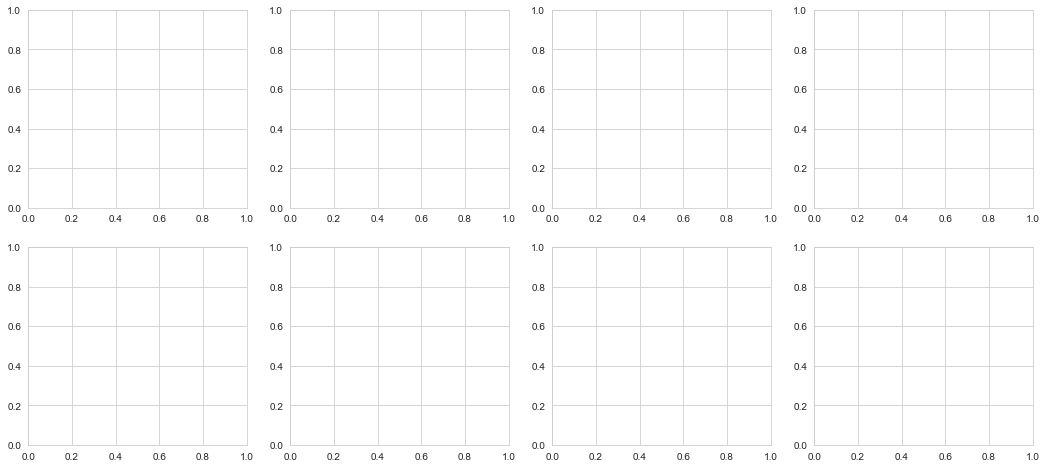

In [227]:
# Let's check the distribution of these new, engineered features.

# We plot first the distribution of new features, grouped by value of corresponding target values.
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
features = train_df.columns.values[202:]
plot_new_feature_distribution(t0, t1, 'target: 0', 'target: 1', features)

<Figure size 432x288 with 0 Axes>

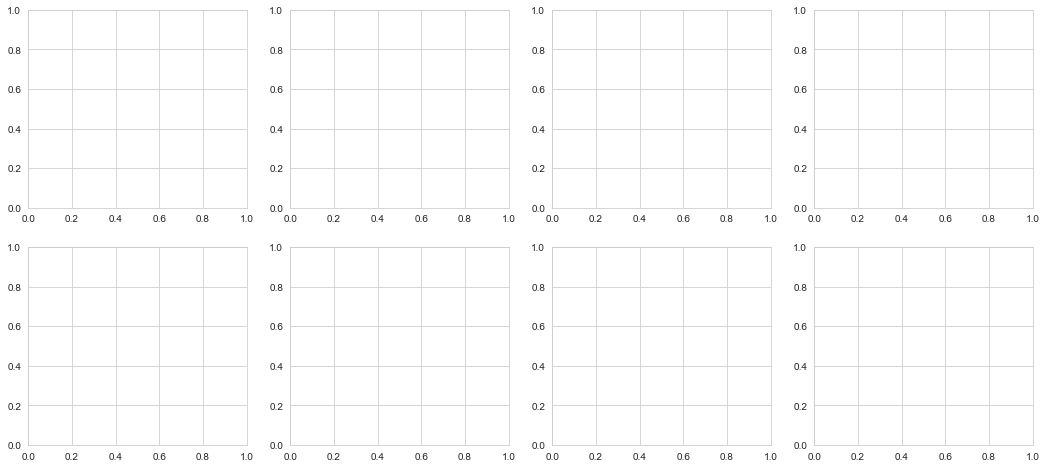

In [228]:
#Let's show the distribution of new features values for train and test.
features = train_df.columns.values[202:]
plot_new_feature_distribution(train_df, test_df, 'train', 'test', features)

In [229]:
features = [c for c in train_df.columns if c not in ['ID_code', 'target']]
for feature in features:
    train_df['r2_'+feature] = np.round(train_df[feature], 2)
    test_df['r2_'+feature] = np.round(test_df[feature], 2)
    train_df['r1_'+feature] = np.round(train_df[feature], 1)
    test_df['r1_'+feature] = np.round(test_df[feature], 1)

In [230]:
print('Train and test columns: {} {}'.format(len(train_df.columns), len(test_df.columns))) # the result should be 210,209

Train and test columns: 602 601


# Model

In [231]:
features = [c for c in train_df.columns if c not in ['ID_code', 'target']]
target = train_df['target']

In [232]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.05,
    'learning_rate': 0.01,
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1
}

In [233]:
folds = StratifiedKFold(n_splits=10, shuffle=False, random_state=44000)
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 1000000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 3000)
    oof[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

Fold 0
Training until validation scores don't improve for 3000 rounds
[1000]	training's auc: 0.884923	valid_1's auc: 0.864158
[2000]	training's auc: 0.909654	valid_1's auc: 0.884143
[3000]	training's auc: 0.921151	valid_1's auc: 0.89196
[4000]	training's auc: 0.92848	valid_1's auc: 0.89581
[5000]	training's auc: 0.934041	valid_1's auc: 0.897457
[6000]	training's auc: 0.938961	valid_1's auc: 0.898612
[7000]	training's auc: 0.943464	valid_1's auc: 0.899137
[8000]	training's auc: 0.947657	valid_1's auc: 0.899422
[9000]	training's auc: 0.951706	valid_1's auc: 0.899319
[10000]	training's auc: 0.955562	valid_1's auc: 0.899372
[11000]	training's auc: 0.959265	valid_1's auc: 0.899361
Early stopping, best iteration is:
[8074]	training's auc: 0.947971	valid_1's auc: 0.899525
Fold 1
Training until validation scores don't improve for 3000 rounds
[1000]	training's auc: 0.885464	valid_1's auc: 0.865304
[2000]	training's auc: 0.909481	valid_1's auc: 0.88477
[3000]	training's auc: 0.920929	valid_1's a

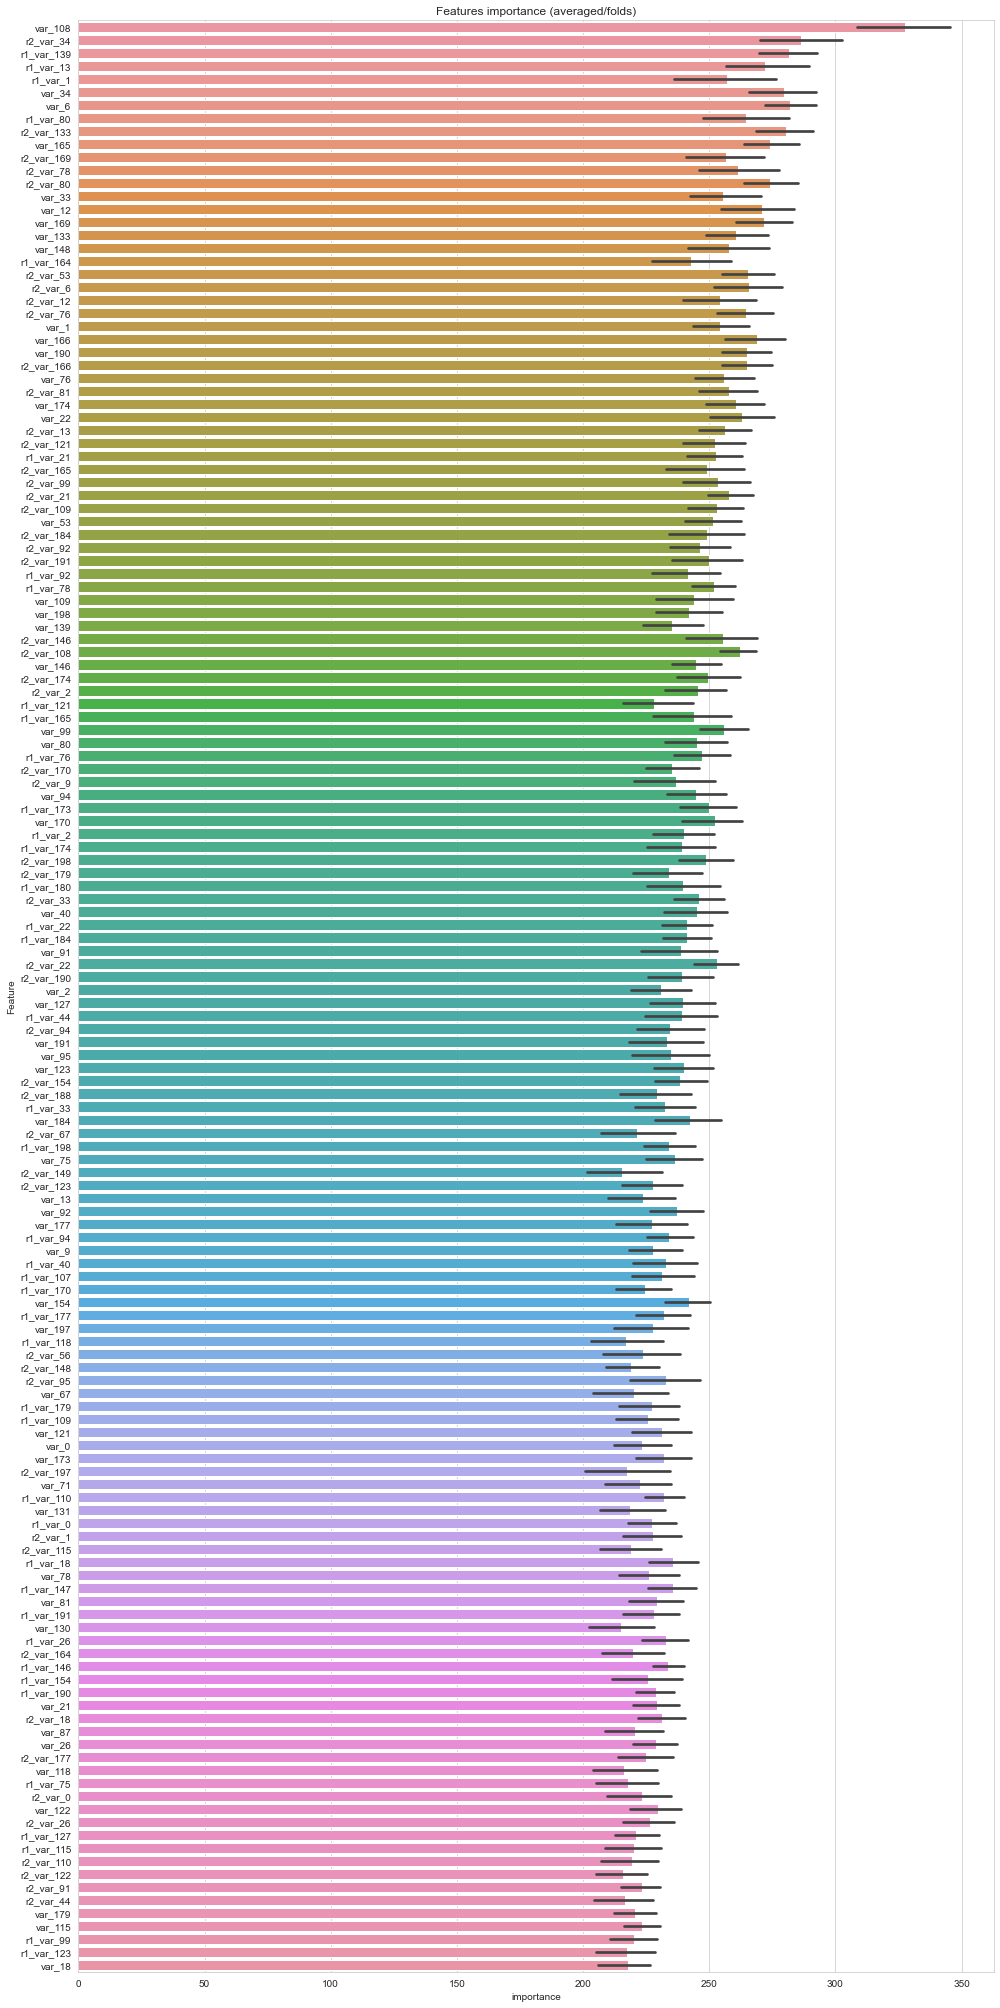

In [234]:
# Let's check the feature importance.
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
plt.savefig('FI.png')